In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
#plt.style.use('seaborn-darkgrid')
plt.style.use('fivethirtyeight')

In [118]:
# LOAD DATA

In [119]:
df = pd.read_csv('NetflixOriginals.csv')

In [120]:
df.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [121]:
# CONVERT PREMIERE INTO DATE TIME FORMAT

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [123]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

In [124]:
# CHECK FOR NULLS

In [125]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [126]:
# CHECK FOR QUALITY OVERTIME OF NETFLIX ORIGINALS

In [127]:
sns.set_context('talk')

In [128]:
df_sorted_by_premiere = df.sort_values(by='Premiere').copy()

Text(0.5, 1.0, 'IMDB Scores through Time')

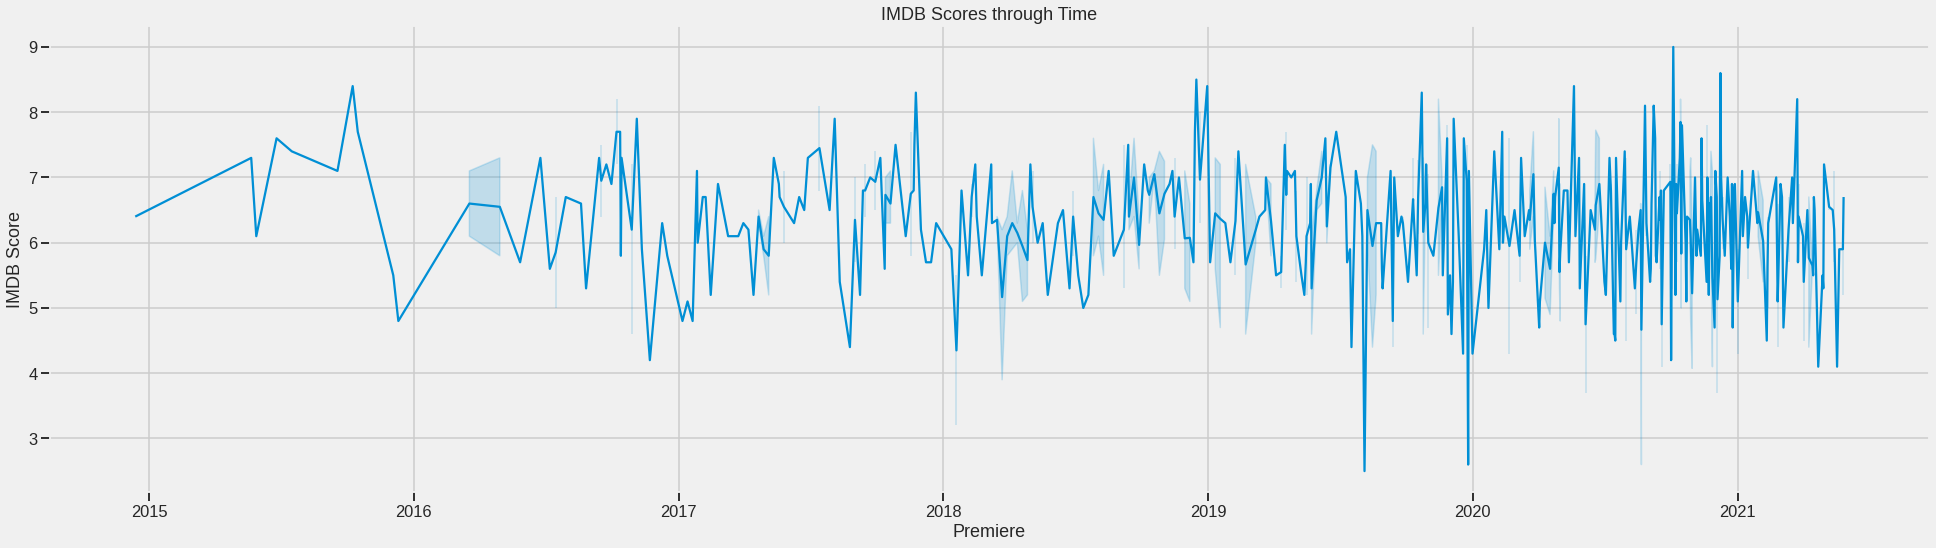

In [129]:
fig, ax = plt.subplots(1,1, figsize=(30,8))
ax = sns.lineplot(data=df_sorted_by_premiere, x='Premiere', y='IMDB Score')
ax.set_title('IMDB Scores through Time')

In [130]:
# GENRE DISTRIBUTION

In [131]:
len(df['Genre'].unique())

115

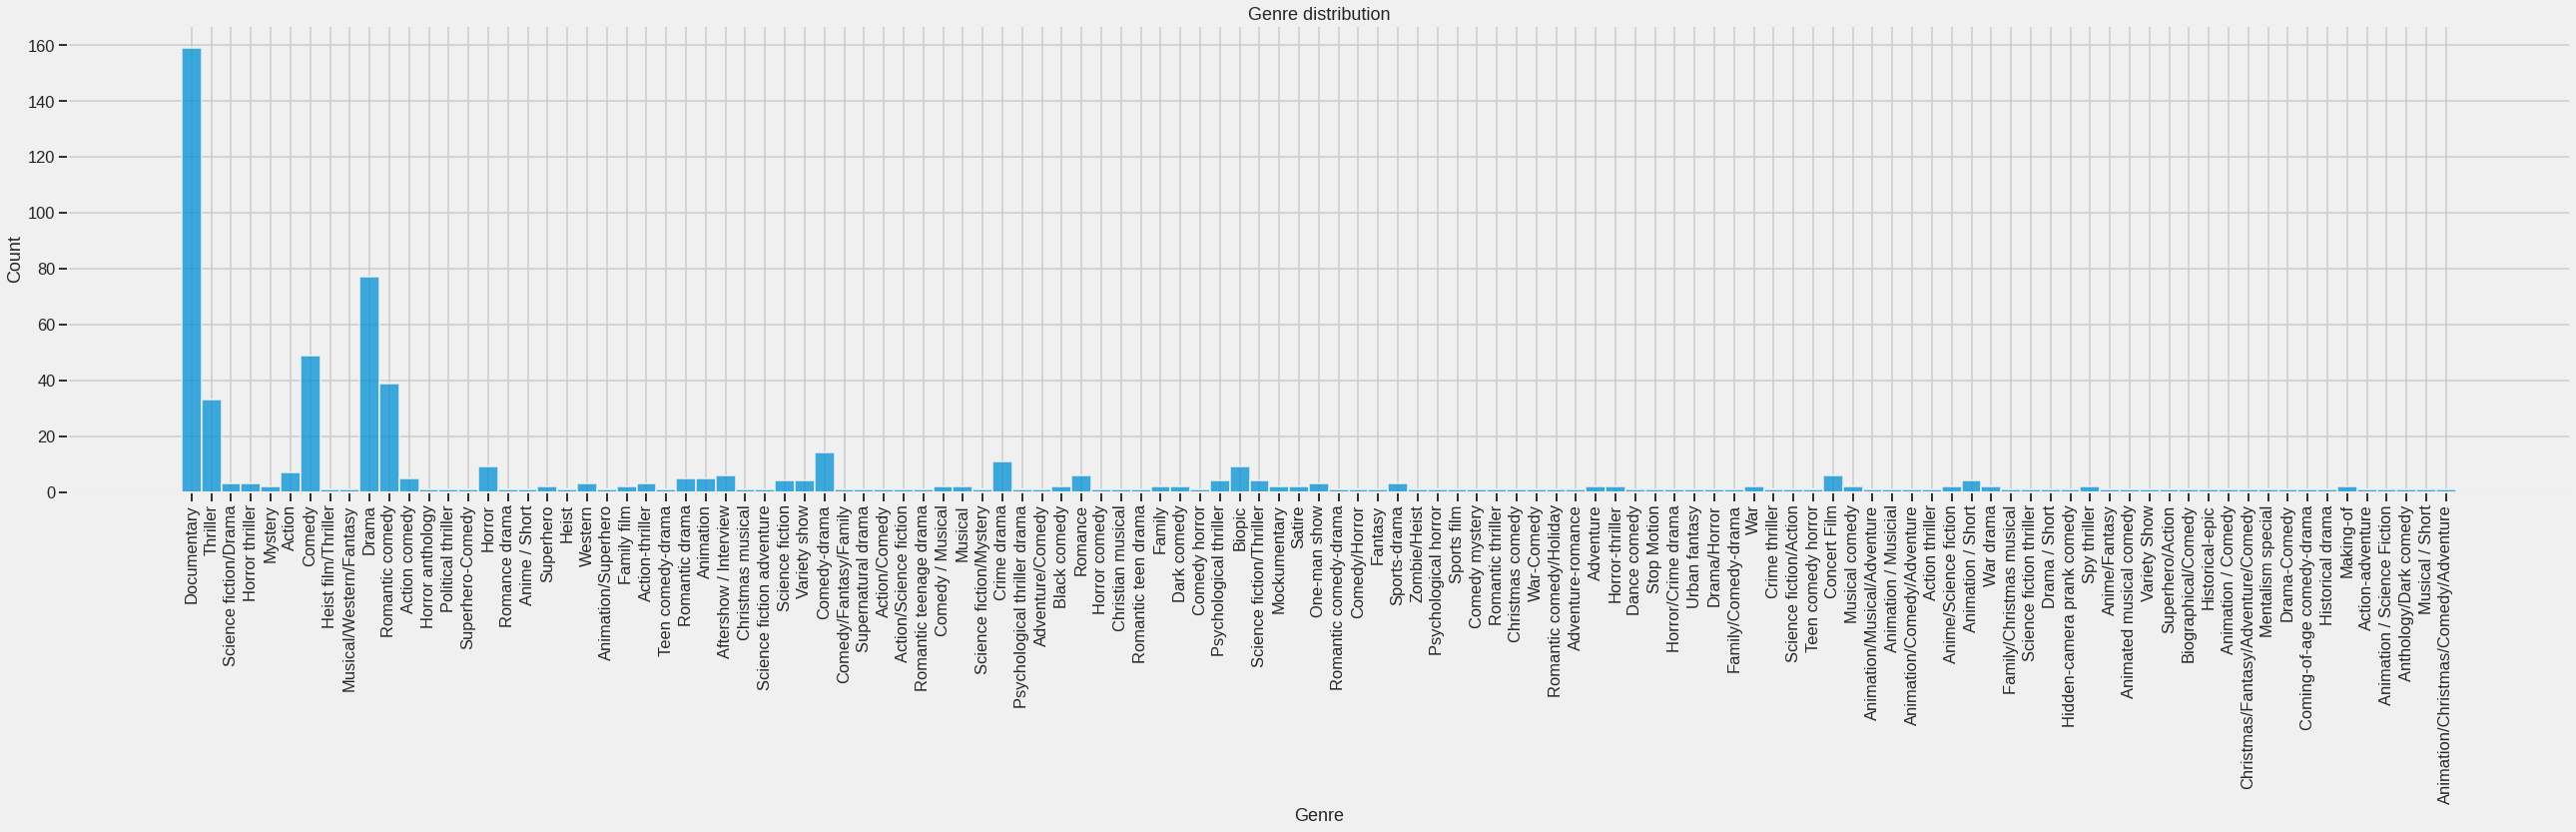

In [132]:
fig, ax = plt.subplots(1,1, figsize=(40,8))
ax = sns.histplot(data=df, x='Genre')
ax.set_title('Genre distribution')
_ = plt.xticks(rotation=90)

In [133]:
# LONGER MOVIES BETTER RATING?

Text(0.5, 1.0, 'Runtime = IMDB Score?')

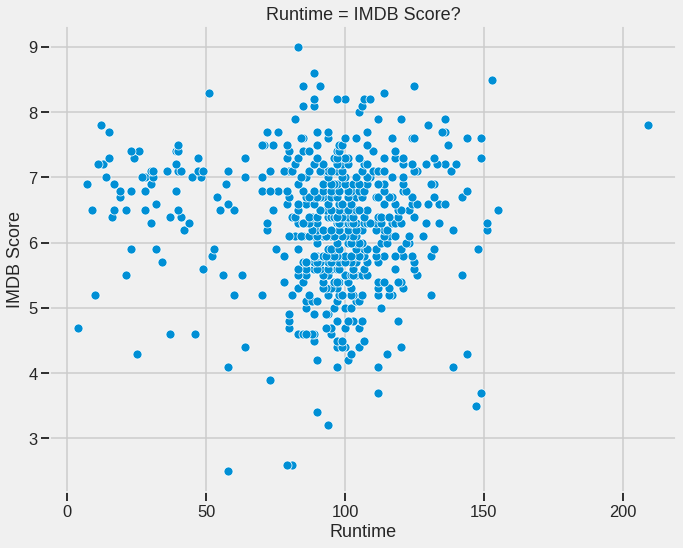

In [134]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(data=df, x='Runtime', y='IMDB Score')
ax.set_title('Runtime = IMDB Score?')

In [135]:
# LANGUAGE DISTRIBUTION

In [136]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

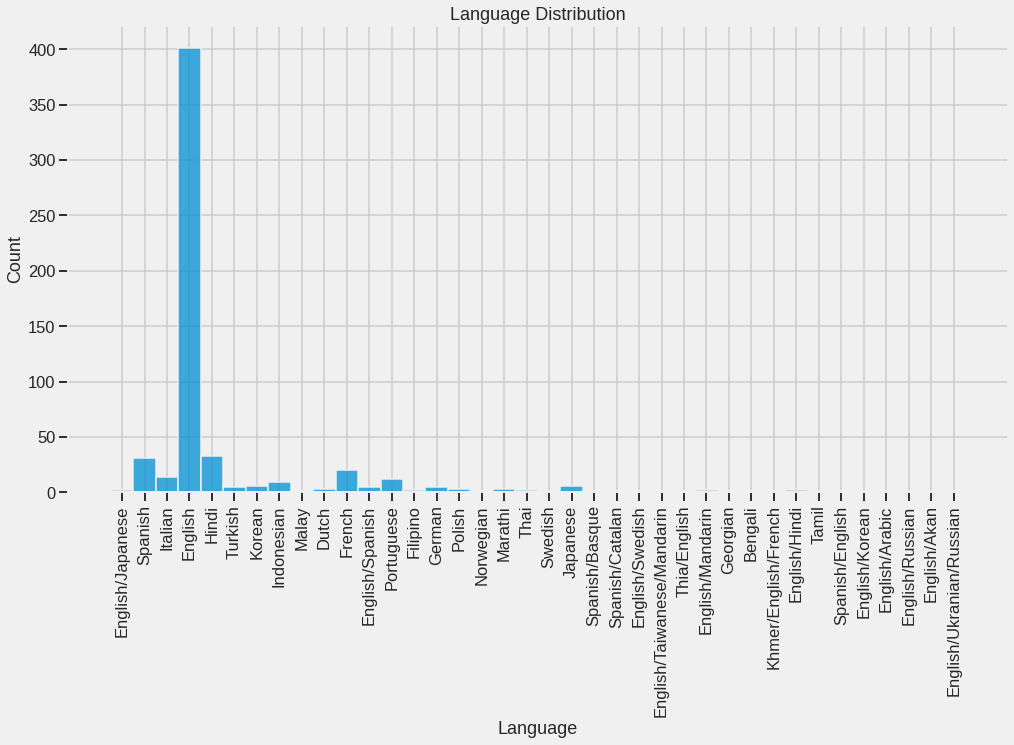

In [137]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
ax = sns.histplot(data=df, x='Language')
ax.set_title('Language Distribution')
_ = plt.xticks(rotation=90)

In [138]:
# SEASON AND RATINGS

In [139]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [140]:
df_season = df.copy()

In [141]:
df_season['Month'] = df_season['Premiere'].dt.month

In [142]:
season_data = df_season.groupby(by='Month')['IMDB Score'].mean()

In [143]:
type(season_data)

pandas.core.series.Series

Text(0.5, 1.0, 'Month and Rating Plot')

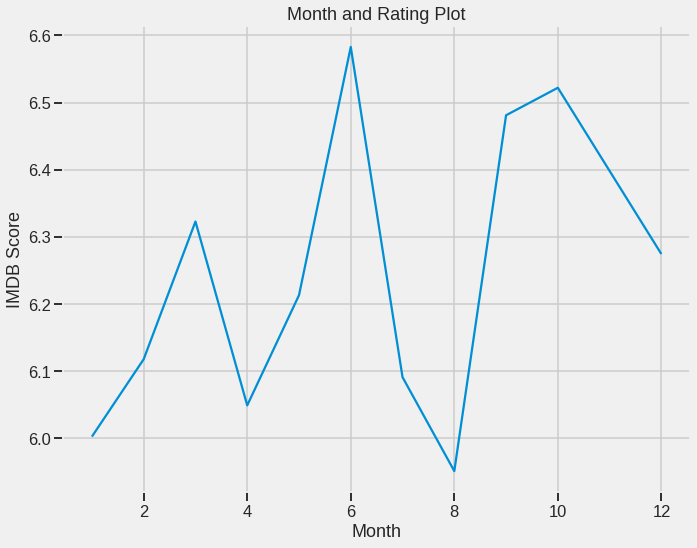

In [144]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.lineplot(data=season_data)
ax.set_title('Month and Rating Plot')

In [145]:
# GENRE AND RATING

In [146]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [147]:
df_genre = df.groupby(by='Genre')['IMDB Score'].mean()

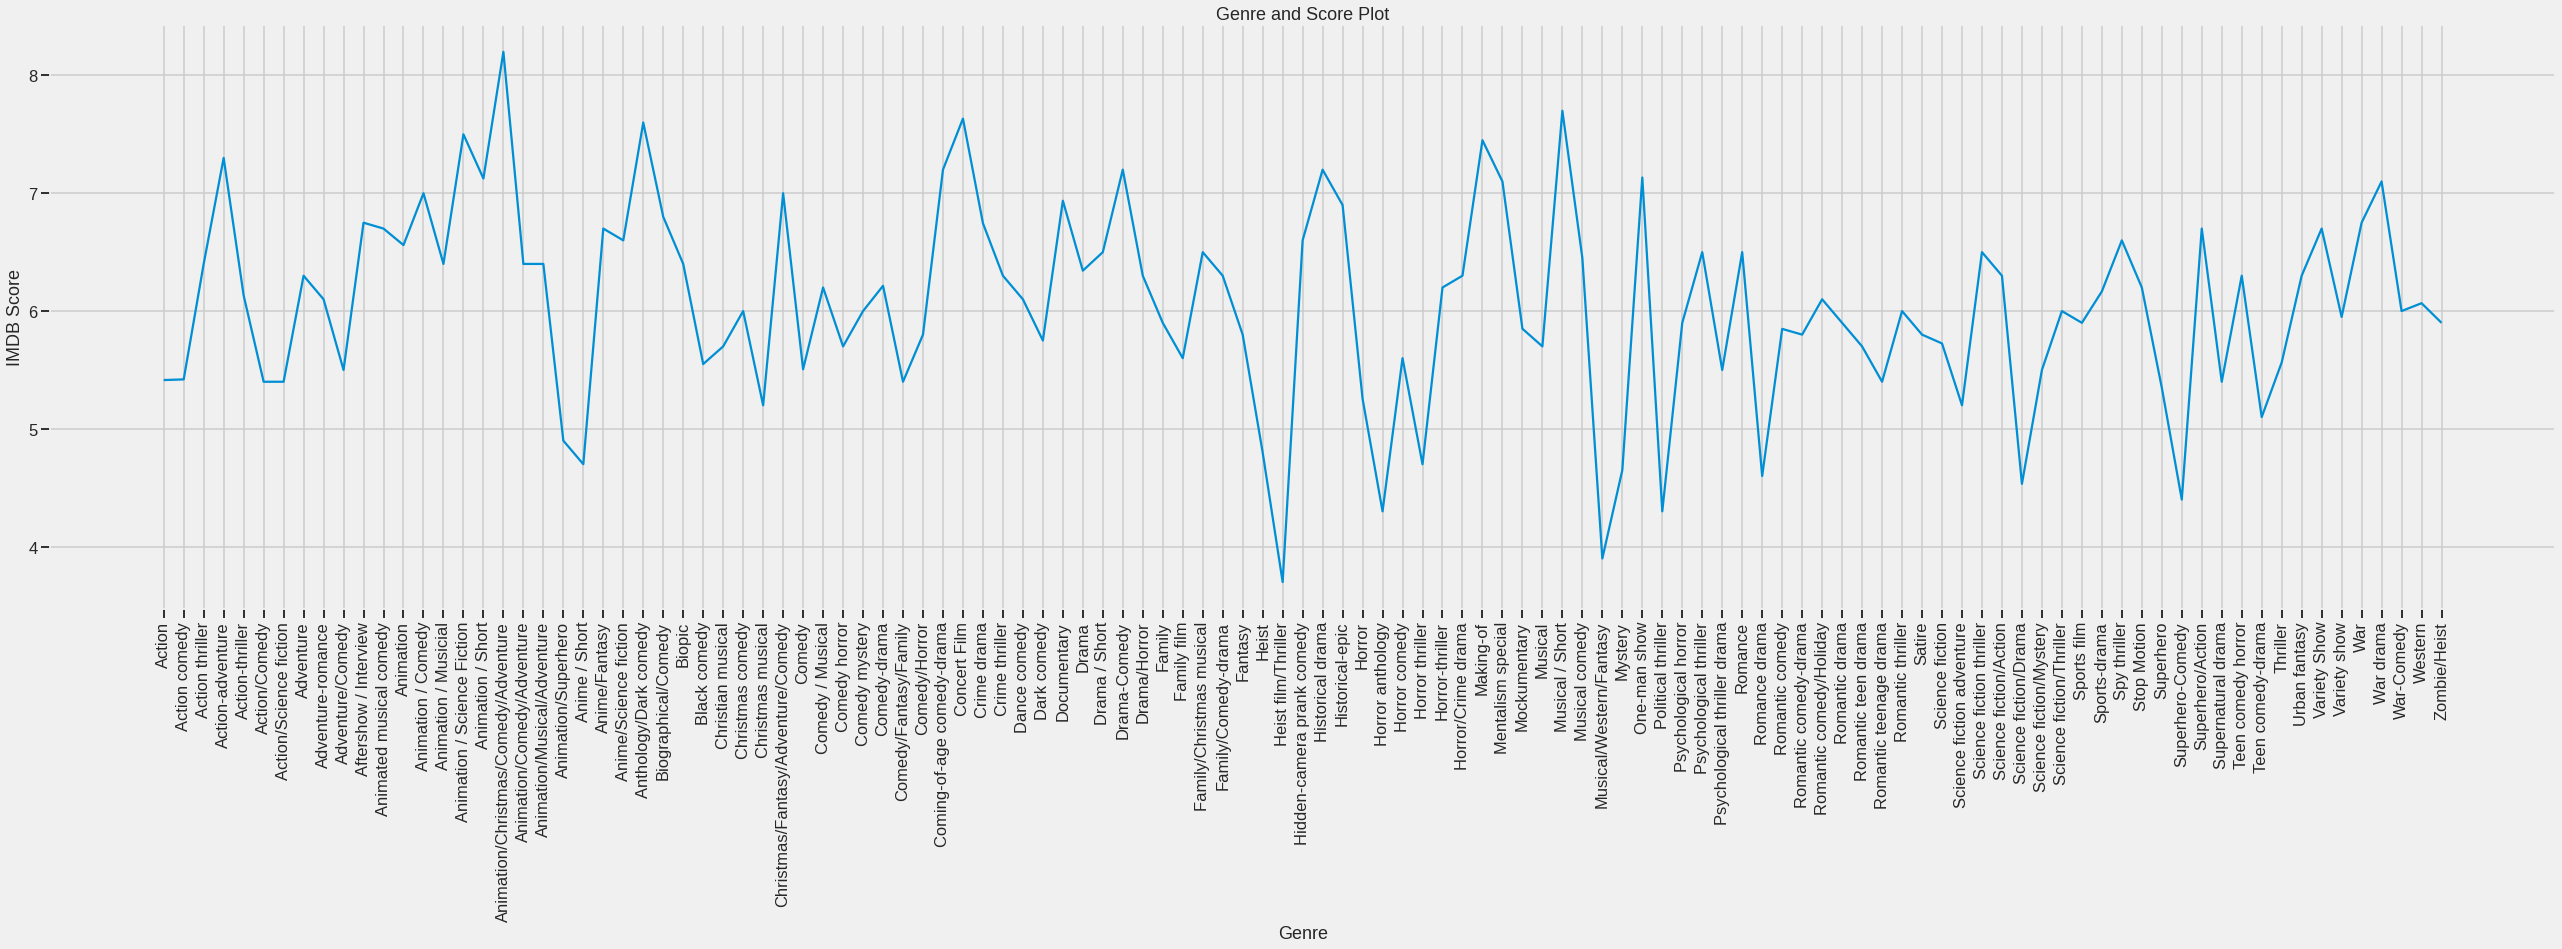

In [148]:
fig, ax = plt.subplots(1,1, figsize=(40,10))
ax = sns.lineplot(data=df_genre)
ax.set_title('Genre and Score Plot')
_ = plt.xticks(rotation=90)